# Univariate Linear Regression (California Housing Dataset)

More info on dataset: https://github.com/ageron/handson-ml/tree/master/datasets/housing

## Load libraries

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing


## Load dataset

In [8]:
dataset = fetch_california_housing()

df = pd.DataFrame(data= np.c_[dataset.data, 100000*dataset.target],
                     columns = dataset.feature_names + ['target'])

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


## Multivariate DNN Regression

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    df[df['target']<500000].drop(['target'], axis=1).values,
    df[df['target']<500000]['target'],
    test_size=0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mape'])
# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=2, validation_split=0.2)

y_pred = model.predict(X_test)

Train on 12574 samples, validate on 3144 samples
Epoch 1/100
 - 3s - loss: 46694728726.3140 - mean_absolute_percentage_error: 99.9804 - val_loss: 45842997800.3868 - val_mean_absolute_percentage_error: 99.9365
Epoch 2/100
 - 1s - loss: 46583868147.4178 - mean_absolute_percentage_error: 99.8196 - val_loss: 45644392109.2723 - val_mean_absolute_percentage_error: 99.6477
Epoch 3/100
 - 1s - loss: 46253493188.5503 - mean_absolute_percentage_error: 99.3520 - val_loss: 45164356678.3511 - val_mean_absolute_percentage_error: 98.9643
Epoch 4/100
 - 1s - loss: 45579647206.9578 - mean_absolute_percentage_error: 98.4043 - val_loss: 44282354263.2875 - val_mean_absolute_percentage_error: 97.7141
Epoch 5/100
 - 1s - loss: 44440109463.8409 - mean_absolute_percentage_error: 96.8101 - val_loss: 42889700411.9288 - val_mean_absolute_percentage_error: 95.7354
Epoch 6/100
 - 1s - loss: 42745927837.3380 - mean_absolute_percentage_error: 94.4050 - val_loss: 40903622259.9491 - val_mean_absolute_percentage_error:

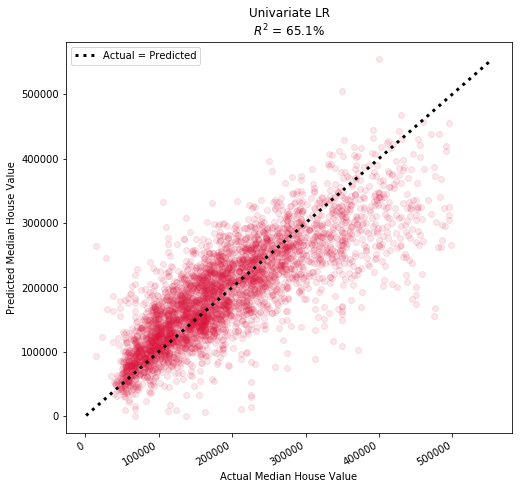

In [0]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('Univariate LR\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()

fig.autofmt_xdate()
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=20,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(1))
# Compile model
model.compile(optimizer='Nadam', loss='mse',  metrics=['mape'])
# Fit the model
model.fit(X_train, y_train, epochs=2000, verbose=2, validation_split=0.2, batch_size=256, callbacks=[es])

y_pred = model.predict(X_test)

Train on 12574 samples, validate on 3144 samples
Epoch 1/2000
 - 2s - loss: 46629845431.4388 - mean_absolute_percentage_error: 99.8780 - val_loss: 45318645285.7812 - val_mean_absolute_percentage_error: 99.1131
Epoch 2/2000
 - 0s - loss: 40284496546.3057 - mean_absolute_percentage_error: 89.7153 - val_loss: 26044858133.4962 - val_mean_absolute_percentage_error: 65.6884
Epoch 3/2000
 - 0s - loss: 12593521744.1349 - mean_absolute_percentage_error: 42.9266 - val_loss: 6692089316.6412 - val_mean_absolute_percentage_error: 38.5636
Epoch 4/2000
 - 0s - loss: 6178484595.6825 - mean_absolute_percentage_error: 37.4061 - val_loss: 5965588026.6260 - val_mean_absolute_percentage_error: 36.1093
Epoch 5/2000
 - 0s - loss: 5606484066.3770 - mean_absolute_percentage_error: 35.4314 - val_loss: 5532096325.6997 - val_mean_absolute_percentage_error: 34.6074
Epoch 6/2000
 - 0s - loss: 5176658740.9753 - mean_absolute_percentage_error: 33.8673 - val_loss: 5160165300.4377 - val_mean_absolute_percentage_error: 

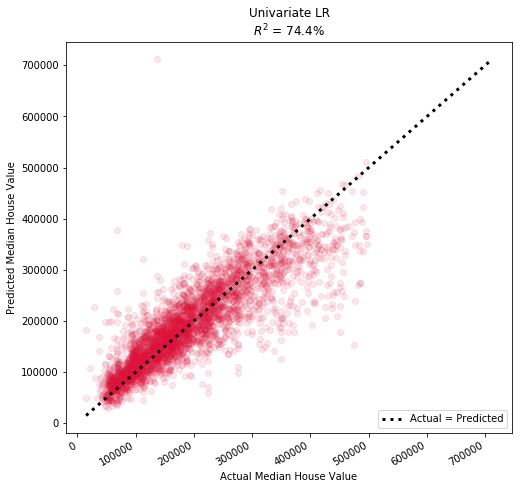

In [0]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('Univariate LR\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()

fig.autofmt_xdate()
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=20,
                   verbose=0,
                   mode='auto',
                   restore_best_weights=True)

model = Sequential()
model.add(Dense(24, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))

model.add(Dense(1))
# Compile model
model.compile(optimizer='Nadam', loss='mse',  metrics=['mape'])
# Fit the model
model.fit(X_train, y_train, epochs=2000, verbose=2, validation_split=0.2, batch_size=256, callbacks=[es])

y_pred = model.predict(X_test)



Train on 12574 samples, validate on 3144 samples
Epoch 1/2000
 - 4s - loss: 32193845782.3954 - mean_absolute_percentage_error: 79.0891 - val_loss: 8811908660.1120 - val_mean_absolute_percentage_error: 45.3390
Epoch 2/2000
 - 1s - loss: 6468262314.0016 - mean_absolute_percentage_error: 36.9941 - val_loss: 5900886900.6005 - val_mean_absolute_percentage_error: 36.0206
Epoch 3/2000
 - 1s - loss: 5063361980.2437 - mean_absolute_percentage_error: 32.5551 - val_loss: 4907128402.0763 - val_mean_absolute_percentage_error: 32.8997
Epoch 4/2000
 - 1s - loss: 4318655852.9435 - mean_absolute_percentage_error: 29.7774 - val_loss: 4719684717.4351 - val_mean_absolute_percentage_error: 25.5643
Epoch 5/2000
 - 1s - loss: 3819784576.9569 - mean_absolute_percentage_error: 27.4841 - val_loss: 3916098994.4835 - val_mean_absolute_percentage_error: 24.6384
Epoch 6/2000
 - 1s - loss: 3696724060.3913 - mean_absolute_percentage_error: 26.7971 - val_loss: 4178305099.5623 - val_mean_absolute_percentage_error: 32.0

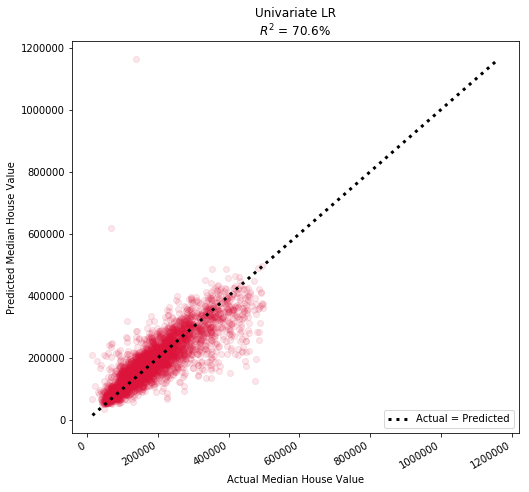

In [0]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('Univariate LR\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()

fig.autofmt_xdate()
plt.show()